In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import os
import matplotlib.pyplot as plt

(10 pts) Presentation and Readability
a. Ensure the Jupyter Notebook is well-organized, with appropriate headings, clear
explanations, and attention to detail.
b. Formatting and Layout: Use clean formatting and provide sufficient explanations to
make your work easy to follow.

In [26]:
import warnings
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)


In [27]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Central Research Question

20 points: Research Question & Hypotheses + Data Description
a. Formulate a Central Research Question: Your project should revolve around a
central research question/theme (e.g., “What factors influence employee retention?”
“How can we reduce customer churn?”) Points awarded on clarity and relevance.
b. Hypothesis Development: Develop 3 hypotheses that you aim to test using the
data. Each hypothesis should be logically connected to the research question for the
above questions.
c. Explain your dataset(s): What is the dataset about? What are the variables of
interest? Provide a data dictionary to define each variable’s meaning.
d. Define the unit of analysis: Clarify the unit of analysis in your dataset (what does
each observation represent)? You may need to do this repeatedly if you transform
your data.
Points are awarded based on clarity and brevity

(20 pts.) Data Preparation.
a. Report all code related to cleaning and preparing the data. This may include creating
new columns, cleaning existing ones, handling missing data and/or filtering data.
Your data preparation should be performed directly in the notebook.
Points are awarded based on clarity, brevity, and showing that you can use the
techniques learned in class.


# Download and Unzip State by State dataset

In [28]:
# RUN ONLY ONCE

# import requests
# from bs4 import BeautifulSoup
# import os
# import zipfile
# # Download the additional ZIP file
# additional_zip_url = 'https://www.epa.gov/system/files/other-files/2024-09/allstateghgdata90-22_v082924.zip'
# additional_zip_path = 'epa_data/allstateghgdata.zip'

# os.makedirs('epa_data', exist_ok=True)

# print(f"Downloading {additional_zip_url}...")
# response = requests.get(additional_zip_url)
# with open(additional_zip_path, 'wb') as file:
#     file.write(response.content)

# print("File downloaded.")

# # Unzip the file
# with zipfile.ZipFile(additional_zip_path, 'r') as zip_ref:
#     zip_ref.extractall('epa_data')

# print("File unzipped.")
# os.rename('epa_data/allstateghgdata90-22_v082924.xlsx', 'epa_data/allstateghgdata.xlsx')


In [29]:
# Assuming the Excel file is named 'allstateghgdata.xlsx' and is located in the 'epa_data' directory
excel_file_path = 'epa_data/allstateghgdata.xlsx'

# Read the Excel file with multiple sheets
un_sector = pd.read_excel(excel_file_path, sheet_name=1)
appendix = pd.read_excel(excel_file_path, sheet_name=3)


KeyboardInterrupt: 

In [ ]:
un_sector.head(5)
appendix.head(5)

sector                                          subsector category  \
0  Agriculture  CO2 Emissions from Liming, Urea Application an...   Liming   
1  Agriculture  CO2 Emissions from Liming, Urea Application an...   Liming   
2  Agriculture  CO2 Emissions from Liming, Urea Application an...   Liming   
3  Agriculture  CO2 Emissions from Liming, Urea Application an...   Liming   
4  Agriculture  CO2 Emissions from Liming, Urea Application an...   Liming   

  sub_category_1 sub_category_2 sub_category_3  sub_category_4  \
0       Dolomite            NaN            NaN             NaN   
1       Dolomite            NaN            NaN             NaN   
2       Dolomite            NaN            NaN             NaN   
3       Dolomite            NaN            NaN             NaN   
4       Dolomite            NaN            NaN             NaN   

   sub_category_5 carbon_pool fuel1  ...     Y2013     Y2014     Y2015 Y2016  \
0             NaN         NaN   NaN  ...  0.000000  0.000000  0.000000   0.0   
1             NaN         NaN   NaN  ...  0.005047  0.000000  0.000000   0.0   
2             NaN         NaN   NaN  ...  0.002264  0.002704  0.003249   0.0   
3             NaN         NaN   NaN  ...  0.000000  0.000000  0.000000   0.0   
4             NaN         NaN   NaN  ...  0.000000  0.000000  0.000000   0.0   

  Y2017  Y2018  Y2019  Y2020  Y2021  Y2022  
0   0.0    0.0    0.0    0.0    0.0    0.0  
1   0.0    0.0    0.0    0.0    0.0    0.0  
2   0.0    0.0    0.0    0.0    0.0    0.0  
3   0.0    0.0    0.0    0.0    0.0    0.0  
4   0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 49 columns]

sector                                          subsector category  \
0  Agriculture  CO2 Emissions from Liming, Urea Application an...   Liming   
1  Agriculture  CO2 Emissions from Liming, Urea Application an...   Liming   
2  Agriculture  CO2 Emissions from Liming, Urea Application an...   Liming   
3  Agriculture  CO2 Emissions from Liming, Urea Application an...   Liming   
4  Agriculture  CO2 Emissions from Liming, Urea Application an...   Liming   

  sub_category_1 sub_category_2 sub_category_3  sub_category_4  \
0       Dolomite            NaN            NaN             NaN   
1       Dolomite            NaN            NaN             NaN   
2       Dolomite            NaN            NaN             NaN   
3       Dolomite            NaN            NaN             NaN   
4       Dolomite            NaN            NaN             NaN   

   sub_category_5 carbon_pool fuel1  ... Y2013 Y2014 Y2015 Y2016 Y2017  Y2018  \
0             NaN         NaN   NaN  ...    NE    NE    NE    NE    NE     NE   
1             NaN         NaN   NaN  ...    NE    NE    NE    NE    NE     NE   
2             NaN         NaN   NaN  ...    NE    NE    NE    NE    NE     NE   
3             NaN         NaN   NaN  ...    NE    NE    NE    NE    NE     NE   
4             NaN         NaN   NaN  ...    NE    NE    NE    NE    NE     NE   

  Y2019 Y2020 Y2021 Y2022  
0    NE    NE    NE    NE  
1    NE    NE    NE    NE  
2    NE    NE    NE    NE  
3    NE    NE    NE    NE  
4    NE    NE    NE    NE  

[5 rows x 49 columns]

In [ ]:
# Drop irrelevant columns
un_sector_col = un_sector.columns
un_sector_col
drop_col = [col for col in un_sector_col if 'sub' in col or 'fuel' in col]
drop_col.append('carbon_pool')
drop_col.append('gwp')
drop_col.append('category')
drop_col.append('units')
drop_col.append('ghg')
drop_col
un_sector.drop(columns=drop_col, inplace=True, errors='ignore')
un_sector.head(5)

Index(['sector', 'subsector', 'category', 'sub_category_1', 'sub_category_2',
       'sub_category_3', 'sub_category_4', 'sub_category_5', 'carbon_pool',
       'fuel1', 'fuel2', 'geo_ref', 'units', 'ghg_category', 'ghg', 'gwp',
       'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997',
       'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005',
       'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013',
       'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021',
       'Y2022'],
      dtype='object')

['subsector',
 'sub_category_1',
 'sub_category_2',
 'sub_category_3',
 'sub_category_4',
 'sub_category_5',
 'fuel1',
 'fuel2',
 'carbon_pool',
 'gwp',
 'category',
 'units',
 'ghg']

sector geo_ref ghg_category     Y1990     Y1991     Y1992     Y1993  \
0  Agriculture      AK          CO2  0.000000  0.000000  0.000000  0.000000   
1  Agriculture      AL          CO2  0.010937  0.011804  0.010346  0.007674   
2  Agriculture      AR          CO2  0.005945  0.006416  0.005624  0.004171   
3  Agriculture      AS          CO2  0.000000  0.000000  0.000000  0.000000   
4  Agriculture      AZ          CO2  0.000000  0.000000  0.000000  0.000000   

      Y1994     Y1995     Y1996  ...     Y2013     Y2014     Y2015  Y2016  \
0  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000    0.0   
1  0.000000  0.015280  0.008071  ...  0.005047  0.000000  0.000000    0.0   
2  0.009672  0.011696  0.007052  ...  0.002264  0.002704  0.003249    0.0   
3  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000    0.0   
4  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000    0.0   

   Y2017  Y2018  Y2019  Y2020  Y2021  Y2022  
0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 36 columns]

In [ ]:
len(un_sector)
years = list(range(1990, 2023))
un_sector_melted = un_sector.melt(id_vars=['sector', 'geo_ref', 'ghg_category'], 
                                  value_vars=[f'Y{year}' for year in years], 
                                  var_name='Year', 
                                  value_name='Emissions (Tg)')
un_sector_melted['Year'] = un_sector_melted['Year'].str[1:].astype(int)

# un_sector_melted.set_index('year', inplace=True)
un_sector_melted.rename(columns={'geo_ref': 'State','ghg_category':'GHG'}, inplace=True)
un_sector_melted = un_sector_melted[['Year', 'sector', 'State', 'GHG', 'Emissions (Tg)']]

un_sector_melted.to_csv('cleaned_ghg_emission.csv')
# combined = un_sector_melted.groupby(['year','sector', 'geo_ref', 'ghg_category'])['Emissions (Tg)'].sum()
# combined
# len(combined)

28448

In [ ]:
stateWeatherDF = pd.read_csv('StateWeatherData.csv')
stateWeatherDF
stateWeatherDF = stateWeatherDF.set_index('Year')
state_abbrev = stateWeatherDF.columns.to_list()
state = un_sector_melted['State'].unique()
un_sector_melted = un_sector_melted[un_sector_melted['State'].isin(state_abbrev)]

Year    AL    AK    AZ    AR    CA    CO    CT    DE    FL  ...    SD  \
0   1990  64.9  25.4  59.7  61.8  58.0  45.6  51.1  57.2  72.5  ...  46.9   
1   1991  64.0  27.0  59.3  61.3  58.1  45.1  51.0  56.9  71.8  ...  46.8   
2   1992  62.1  25.0  59.6  59.9  59.3  45.3  47.7  53.9  70.3  ...  45.6   
3   1993  62.3  29.9  59.8  59.3  57.7  43.8  48.7  54.9  70.3  ...  42.3   
4   1994  63.1  26.2  60.6  60.4  58.0  46.5  48.9  55.0  71.6  ...  44.9   
5   1995  63.0  27.8  61.0  60.5  58.9  45.7  49.0  55.1  70.8  ...  44.7   
6   1996  62.1  25.1  61.9  59.6  59.6  45.8  48.4  54.0  69.9  ...  41.6   
7   1997  62.4  28.1  60.5  59.7  59.1  44.8  48.6  54.8  71.1  ...  44.8   
8   1998  65.1  28.4  59.3  63.1  56.7  46.3  51.6  57.4  72.5  ...  47.4   
9   1999  64.1  24.0  60.8  62.2  58.0  46.6  50.9  56.5  71.2  ...  47.8   
10  2000  63.6  28.4  61.7  60.9  58.8  47.0  48.5  54.7  70.6  ...  46.0   
11  2001  63.0  27.3  61.2  61.2  59.1  46.9  50.2  56.1  70.9  ...  46.5   
12  2002  63.6  30.1  61.2  60.6  58.9  46.1  50.5  57.2  71.3  ...  46.2   
13  2003  62.7  29.1  61.9  60.3  59.4  47.0  48.2  54.6  70.9  ...  46.1   
14  2004  63.3  29.3  60.4  61.0  58.9  45.8  48.8  55.8  70.8  ...  46.3   
15  2005  63.4  29.2  61.1  62.0  58.6  46.8  49.5  55.7  70.8  ...  47.3   
16  2006  64.2  26.4  61.1  62.0  58.6  46.5  51.1  57.3  71.4  ...  48.1   
17  2007  64.4  28.1  61.6  61.8  58.9  46.2  49.5  56.3  71.8  ...  46.8   
18  2008  62.9  25.1  60.6  59.9  58.9  44.9  49.7  56.3  70.8  ...  43.8   
19  2009  62.9  26.8  61.1  59.9  58.8  45.2  48.8  55.4  71.2  ...  43.6   
20  2010  62.7  27.4  60.4  61.2  57.7  46.2  51.4  56.7  69.2  ...  45.1   
21  2011  63.8  27.0  60.3  61.8  57.4  45.4  50.9  57.4  71.7  ...  44.8   
22  2012  64.9  24.3  62.1  63.6  59.5  48.3  52.5  58.5  71.9  ...  49.3   
23  2013  62.6  27.8  60.5  59.6  59.3  45.1  49.8  55.8  71.7  ...  44.0   
24  2014  62.0  30.3  62.3  58.7  61.5  46.1  48.7  54.7  70.6  ...  43.7   
25  2015  64.6  30.0  61.8  61.4  60.8  47.4  49.8  56.4  73.4  ...  47.5   
26  2016  65.3  31.9  62.2  62.8  60.1  47.3  51.8  57.4  72.5  ...  48.4   
27  2017  65.0  29.3  63.0  62.5  60.3  47.9  50.9  57.6  72.8  ...  46.8   
28  2018  64.5  30.4  62.3  61.2  60.1  47.2  50.8  57.1  72.3  ...  44.1   
29  2019  65.4  32.2  60.3  61.2  58.4  45.3  49.8  57.5  73.2  ...  42.3   
30  2020  64.9  27.5  62.6  61.2  60.5  47.3  51.8  58.0  73.2  ...  46.8   
31  2021  64.2  26.5  62.1  61.4  60.4  47.5  51.4  57.4  72.2  ...  48.0   
32  2022  64.0  28.6  61.2  61.2  60.1  46.2  51.0  56.5  72.5  ...  45.2   

      TN    TX    UT    VT    VA    WA    WV    WI    WY  
0   59.4  65.6  48.7  44.1  57.4  47.3  53.9  44.5  41.9  
1   59.1  64.8  47.5  43.5  57.0  47.1  53.9  43.7  41.7  
2   57.0  64.4  49.0  40.6  54.4  48.6  51.3  42.7  42.5  
3   57.2  64.1  46.8  41.2  55.1  45.6  51.9  41.7  38.9  
4   57.6  65.6  49.7  41.3  55.3  47.9  51.8  43.0  42.9  
5   57.4  65.2  49.2  42.3  55.0  47.5  51.6  42.8  41.7  
6   56.6  65.4  49.6  42.0  54.0  45.6  50.7  40.5  41.0  
7   56.8  63.9  48.2  41.1  54.5  47.1  51.0  42.6  41.2  
8   60.2  67.0  48.3  45.2  57.4  48.6  54.2  47.3  42.5  
9   59.3  66.6  49.2  44.3  56.3  46.9  53.0  45.4  43.2  
10  58.0  66.5  50.2  41.8  54.9  46.2  51.8  43.9  42.5  
11  58.3  65.7  50.0  43.8  55.8  46.9  52.7  45.3  43.2  
12  58.7  65.0  48.8  43.6  56.6  46.9  53.2  44.6  41.4  
13  57.5  65.5  50.6  41.5  55.0  48.2  51.6  43.2  43.1  
14  58.5  65.2  48.7  41.8  55.9  48.4  52.7  43.5  42.4  
15  58.8  66.0  49.3  43.4  55.9  47.3  52.8  45.1  42.8  
16  58.9  67.1  49.2  45.1  56.6  47.5  53.0  46.0  43.2  
17  59.9  64.8  49.9  42.2  56.8  46.8  53.3  44.7  43.3  
18  57.6  65.5  48.1  43.1  55.7  45.8  51.8  41.8  40.7  
19  57.6  65.8  48.4  42.3  55.2  46.4  51.7  42.4  40.9  
20  57.9  65.1  48.3  44.9  55.9  47.1  52.1  45.5  42.0  
21  58.9  67.3  47.6  44.3  57.0  45.5  53.5  44.1  41.1  
22  60.3  67.8  50.9  45.9  

In [ ]:
# Function to get temperature based on year and state
def get_temperature(year, state):
    return stateWeatherDF.loc[year, state]

# Apply the function to create the new temperature column
un_sector_melted['Temperature'] = un_sector_melted.apply(lambda row: get_temperature(row['Year'], row['State']), axis=1)


un_sector_melted.to_csv('cleaned_ghg_temp.csv', index=False)


In [ ]:
un_sector_melted.head(5)

Year       sector State  GHG  Emissions (Tg)  Temperature
0  1990  Agriculture    AK  CO2        0.000000         25.4
1  1990  Agriculture    AL  CO2        0.010937         64.9
2  1990  Agriculture    AR  CO2        0.005945         61.8
4  1990  Agriculture    AZ  CO2        0.000000         59.7
5  1990  Agriculture    CA  CO2        0.001105         58.0

In [ ]:
un_sector_melted.groupby(['Year', 'sector', 'State', 'GHG']).agg({'Emissions (Tg)': 'sum', 'Temperature': 'mean'})
# un_sector[(un_sector['sector'] == 'Agriculture') & (un_sector['geo_ref'] == 'AK') & (un_sector['ghg_category'] == 'CO2')]

Emissions (Tg)  Temperature
Year sector      State GHG                             
1990 Agriculture AK    CH4        0.019795         25.4
                       CO2        0.004000         25.4
                       N2O        0.006266         25.4
                 AL    CH4        3.746019         64.9
                       CO2        0.095663         64.9
...                                    ...          ...
2022 Waste       WI    N2O        0.368128         42.9
                 WV    CH4        0.901383         52.4
                       N2O        0.088324         52.4
                 WY    CH4        0.237557         42.0
                       N2O        0.042695         42.0

[33957 rows x 2 columns]

In [ ]:
new_data = pd.read_csv('cleaned_ghg_temp.csv')
new_data.to_csv('cleaned_ghg_temp.csv', index=False)

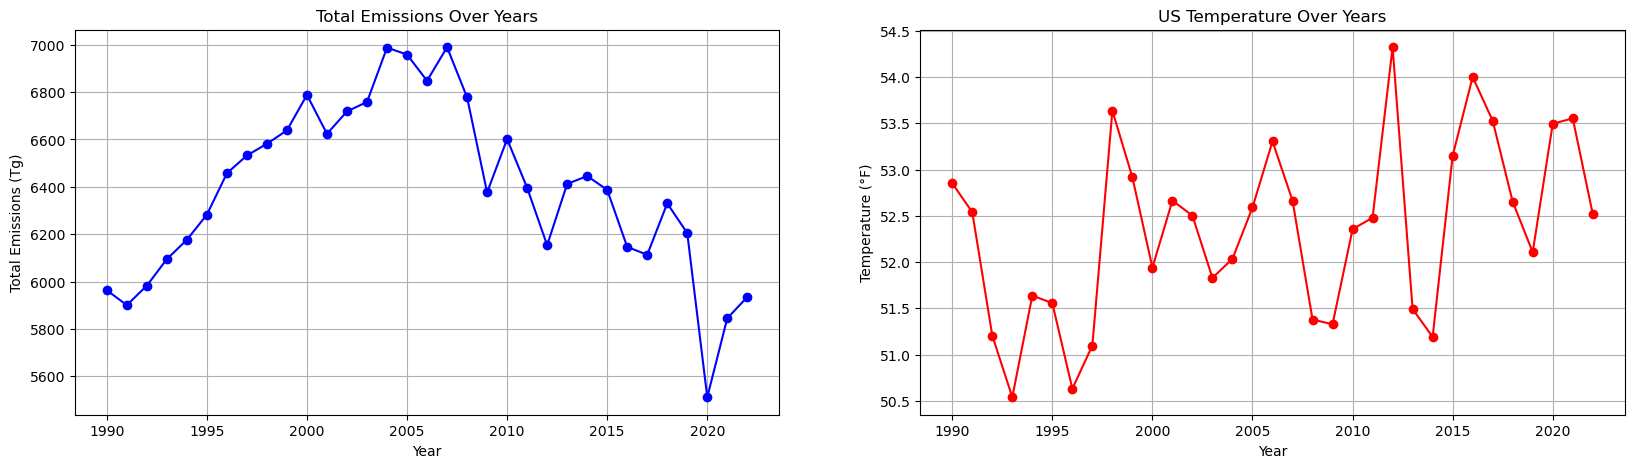

In [ ]:
data = un_sector_melted.groupby(['Year']).agg({'Emissions (Tg)': 'sum', 'Temperature': 'mean'})
years = data.index.values

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

axes[0].plot(years, data['Emissions (Tg)'], marker='o', linestyle='-', color='b')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total Emissions (Tg)')
axes[0].set_title('Total Emissions Over Years')
axes[0].grid(True)

axes[1].plot(years, data['Temperature'], marker='o', linestyle='-', color='r')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Temperature (°F)')
axes[1].set_title('US Temperature Over Years')
axes[1].grid(True)

plt.show();

Emissions vs. Temperature
The equation of the regression line is: y = 0.02x + 49.00
Correlation value: 0.3860074778339057
R-squared value: 0.1490017729436931

Emissions vs. Temperature Shifted by 2 Years
The equation of the regression line is: y = 0.03x + 48.92
Correlation value: 0.3860074778339057
R-squared value: 0.15149596904300977


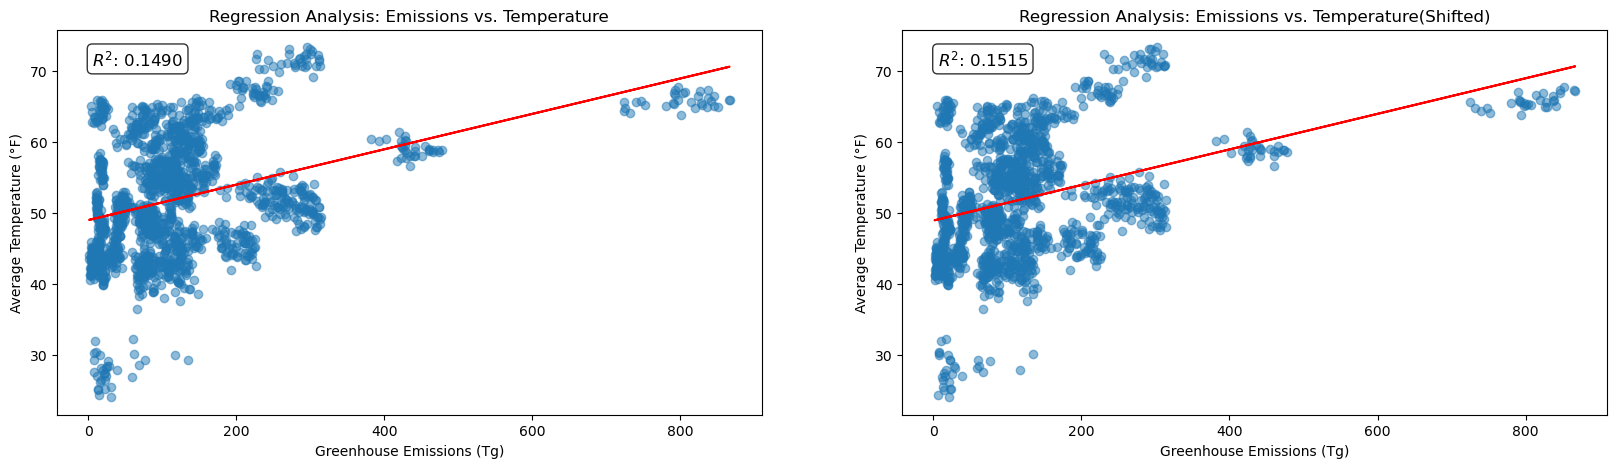

In [ ]:
# Load needed packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

data = un_sector_melted.groupby(['Year','State']).agg({'Emissions (Tg)': 'sum', 'Temperature': 'mean'})
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Split the data into features (X) and target (y)
X = data['Emissions (Tg)'].values.reshape(-1, 1)
y = data['Temperature'].values

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print("Emissions vs. Temperature")
# Print the line of best fit equation
slope = model.coef_[0]
intercept = model.intercept_
print(f"The equation of the regression line is: y = {slope:.2f}x + {intercept:.2f}")
# Calculate correlation coefficient
correlation = np.corrcoef(X.flatten(), y)[0, 1]
print(f"Correlation value: {correlation}")
# Calculate R-squared to assess the model
r2 = r2_score(y, y_pred)
print(f"R-squared value: {r2}")



axes[0].scatter(X, y, label='Actual Data', alpha=0.5)
axes[0].plot(X, y_pred, color='red', label='Regression Line')
axes[0].text(0.05, 0.95, f'$R^2$: {r2:.4f}', transform=axes[0].transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
axes[0].set_xlabel('Greenhouse Emissions (Tg)')
axes[0].set_ylabel('Average Temperature (°F)')
axes[0].set_title('Regression Analysis: Emissions vs. Temperature')
# axes[0].legend()

data['Temperature_Shift_2'] = data['Temperature'].shift(2*49)
data.dropna(inplace=True)
X_shifted = data['Emissions (Tg)'].values.reshape(-1, 1)
y_shifted = data['Temperature_Shift_2'].values

# Fit a linear regression model
model = LinearRegression()
model.fit(X_shifted, y_shifted)
y_pred_shifted = model.predict(X_shifted)
print("\nEmissions vs. Temperature Shifted by 2 Years")
# Print the line of best fit equation
slope = model.coef_[0]
intercept = model.intercept_
print(f"The equation of the regression line is: y = {slope:.2f}x + {intercept:.2f}")
# Calculate correlation coefficient
correlation = np.corrcoef(X.flatten(), y)[0, 1]
print(f"Correlation value: {correlation}")
# Calculate R-squared to assess the model
r2 = r2_score(y_shifted, y_pred_shifted)
print(f"R-squared value: {r2}")

# Highlight the outliers in pink
axes[1].scatter(X_shifted, y_shifted, label='Actual Data', alpha=0.5)
axes[1].plot(X_shifted, y_pred_shifted, color='red', label='Regression Line')
axes[1].text(0.05, 0.95, f'$R^2$: {r2:.4f}', transform=axes[1].transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
axes[1].set_xlabel('Greenhouse Emissions (Tg)')
axes[1].set_ylabel('Average Temperature (°F)')
axes[1].set_title('Regression Analysis: Emissions vs. Temperature(Shifted)')
# axes[1].legend()

plt.show();

Cumulative Emissions vs. Temperature
The equation of the regression line is: y = 0.00x + 50.11
R-squared value: 0.10392319178641418
Correlation value: 0.3223712018565155


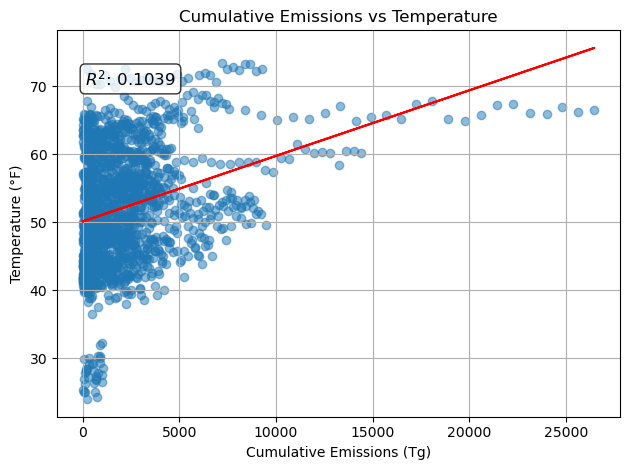

In [ ]:
# Calculate cumulative emissions for each state by year
un_sector_melted['Cumulative Emissions (Tg)'] = un_sector_melted.groupby('State')['Emissions (Tg)'].cumsum()
data = un_sector_melted.groupby(['Year','State']).agg({'Emissions (Tg)': 'sum', 'Temperature': 'mean'})
data['Cumulative Emissions (Tg)'] = data.groupby('State')['Emissions (Tg)'].cumsum()
data

# Plot cumulative emissions vs temperature
plt.scatter(data['Cumulative Emissions (Tg)'], data['Temperature'], alpha=0.5)
plt.xlabel('Cumulative Emissions (Tg)')
plt.ylabel('Temperature (°F)')
plt.title('Cumulative Emissions vs Temperature')
plt.grid(True)

# Fit a linear regression model
X = data['Cumulative Emissions (Tg)'].values.reshape(-1, 1)
y = data['Temperature'].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot the regression line
plt.plot(data['Cumulative Emissions (Tg)'], y_pred, color='red', label='Regression Line')

# Calculate R-squared to assess the model
r2 = r2_score(y, y_pred)
plt.text(0.05, 0.90, f'$R^2$: {r2:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
print("Cumulative Emissions vs. Temperature")
# Print the line of best fit equation
slope = model.coef_[0]
intercept = model.intercept_
print(f"The equation of the regression line is: y = {slope:.2f}x + {intercept:.2f}")
print(f"R-squared value: {r2}")
# Calculate correlation coefficient
correlation = data['Cumulative Emissions (Tg)'].corr(data['Temperature'])
print(f"Correlation value: {correlation}")
plt.tight_layout()
plt.show();

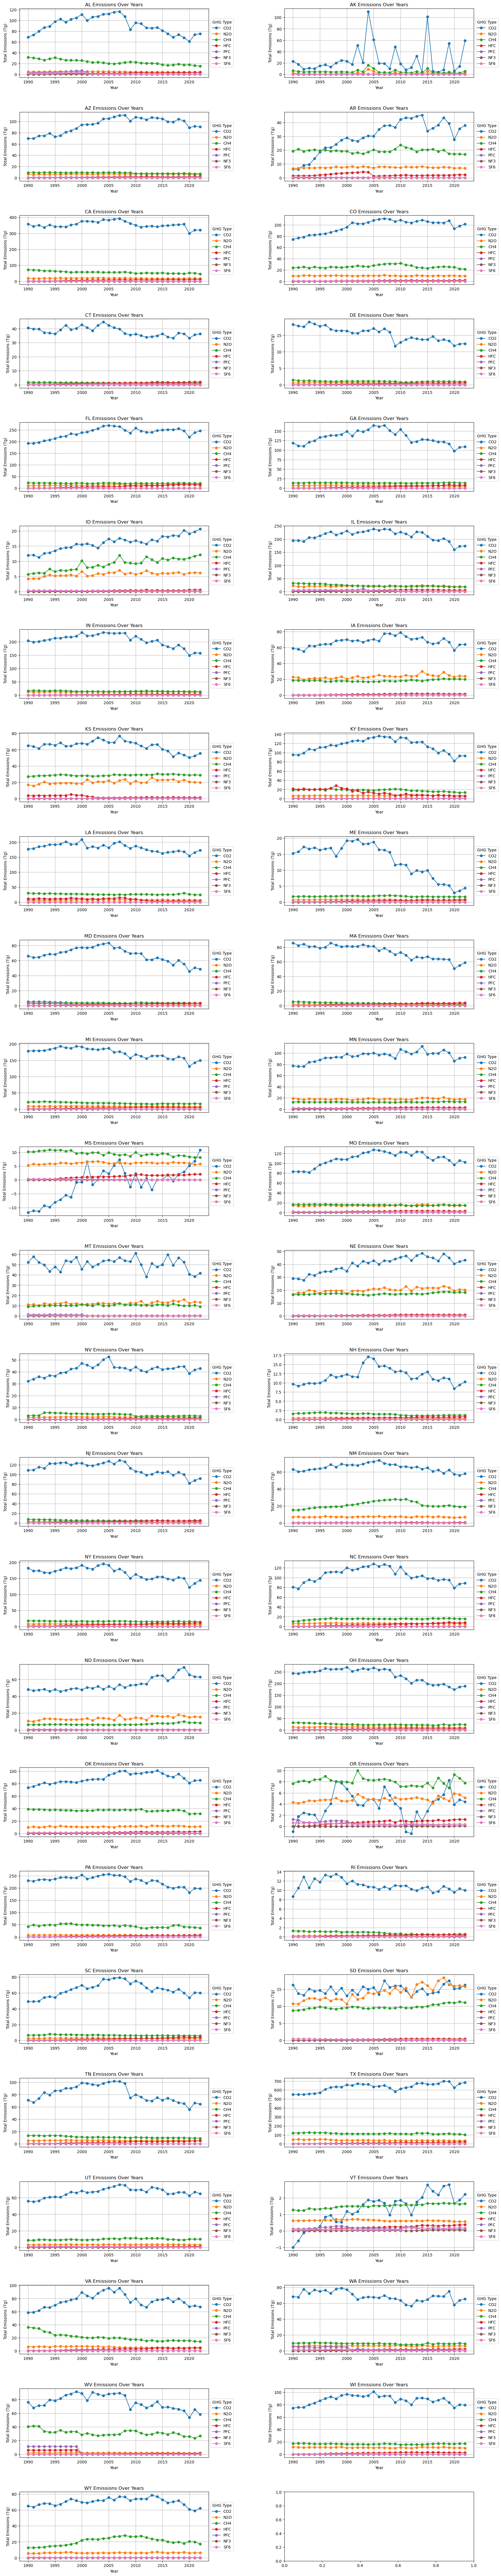

In [30]:
data = un_sector_melted.groupby(['Year']).agg({'Emissions (Tg)': 'sum', 'Temperature': 'mean'})
years = data.index.values

fig, axes = plt.subplots(25, 2, figsize=(20, 100))

for i, state in enumerate(state_abbrev):
    row, col = divmod(i, 2)
    state_data = un_sector_melted[un_sector_melted['State'] == state]
    state_data = state_data.groupby(['Year']).agg({'Emissions (Tg)': 'sum', 'Temperature': 'mean'})
    
    # Plot Emissions
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel('Total Emissions (Tg)')
    axes[row, col].set_title(f'{state} Emissions Over Years')
    axes[row, col].grid(True)
    
    # Plot Emissions for different GHG types
    ghg_types = un_sector_melted['GHG'].unique()
    for ghg in ghg_types:
        ghg_data = un_sector_melted[(un_sector_melted['State'] == state) & (un_sector_melted['GHG'] == ghg)]
        ghg_data = ghg_data.groupby(['Year']).agg({'Emissions (Tg)': 'sum'})
        axes[row, col].plot(ghg_data.index, ghg_data['Emissions (Tg)'], marker='o', linestyle='-', label=ghg)
    
    axes[row, col].legend(title='GHG Type', loc='center left', bbox_to_anchor=(1, 0.5))

fig.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.05, hspace=0.5, wspace=0.4)

plt.show();

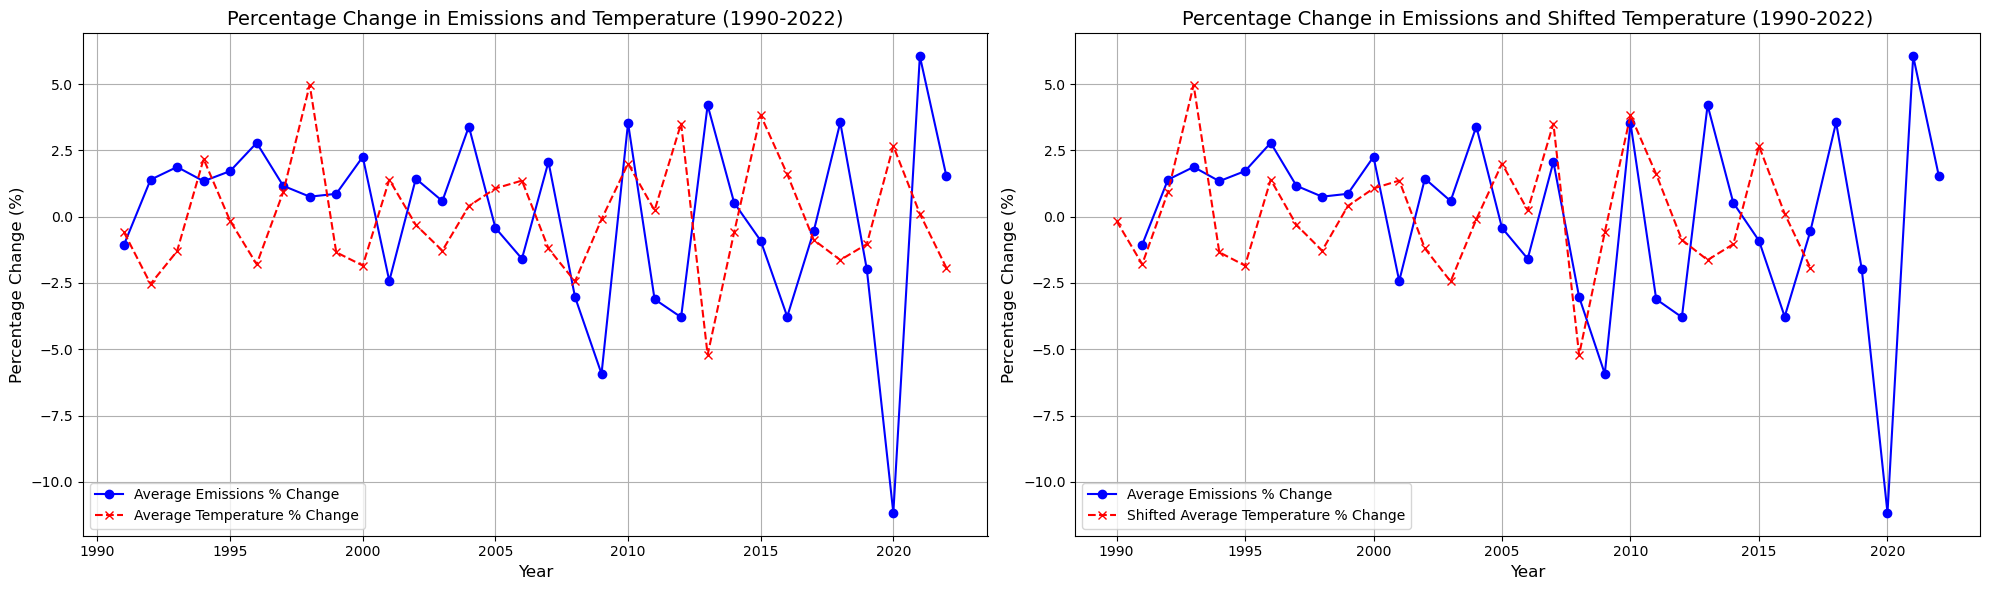

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure unique combination of 'Year' and 'State'
un_sector_melted_unique = un_sector_melted.groupby(['Year']).agg({'Emissions (Tg)': 'sum', 'Temperature': 'mean'})

# Calculate percentage change for emissions and temperature data
emissions_pct_change = un_sector_melted_unique['Emissions (Tg)'].pct_change() * 100
temperature_pct_change = un_sector_melted_unique['Temperature'].pct_change() * 100

# Years for plotting
years = emissions_pct_change.index

# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot emissions percentage change
axes[0].plot(years, emissions_pct_change, label='Average Emissions % Change', marker='o', linestyle='-', color='blue')
axes[0].plot(years, temperature_pct_change, label='Average Temperature % Change', marker='x', linestyle='--', color='red')
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Percentage Change (%)', fontsize=12)
axes[0].set_title('Percentage Change in Emissions and Temperature (1990-2022)', fontsize=14)
axes[0].legend(fontsize=10)
axes[0].grid(True)

# Shift temperature percentage change back by 2 years
temperature_pct_change_shifted = temperature_pct_change.shift(-5)

# Plot shifted temperature percentage change
axes[1].plot(years, emissions_pct_change, label='Average Emissions % Change', marker='o', linestyle='-', color='blue')
axes[1].plot(years, temperature_pct_change_shifted, label='Shifted Average Temperature % Change', marker='x', linestyle='--', color='red')
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Percentage Change (%)', fontsize=12)
axes[1].set_title('Percentage Change in Emissions and Shifted Temperature (1990-2022)', fontsize=14)
axes[1].legend(fontsize=10)
axes[1].grid(True)

plt.tight_layout()
plt.show();


In [ ]:
un_sector_melted.groupby(['Year','State','GHG']).agg({'Emissions (Tg)': 'sum', 'Temperature': 'mean'})


Emissions (Tg)  Temperature
Year State GHG                             
1990 AK    CH4        6.344382         25.4
           CO2       22.648210         25.4
           HFC        0.000552         25.4
           N2O        2.118150         25.4
           NF3        0.000000         25.4
...                        ...          ...
2022 WY    HFC        0.175156         42.0
           N2O        6.345639         42.0
           NF3        0.000000         42.0
           PFC        0.003553         42.0
           SF6        0.078427         42.0

[11319 rows x 2 columns]

LinearRegression()

R^2: 0.0006800344104220812


ValueError: x and y must have same first dimension, but have shapes (167178, 1) and (1617,)

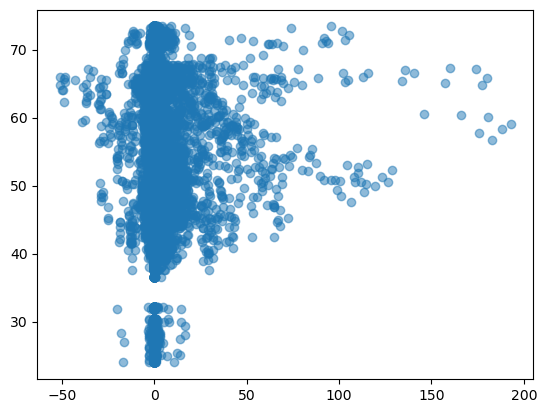

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load your data
data = pd.read_csv('cleaned_ghg_temp.csv')

# Define dependent (y) and independent variables (X)
X = data['Emissions (Tg)'].values.reshape(-1, 1)
y = data['Temperature'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Check performance
print(f"R^2: {model.score(X_test, y_test)}")

# Plot the relationship and regression line
plt.scatter(X_test, y_test, label='Actual Data', alpha=0.5)
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Greenhouse Emissions (Ozone Arithmetic Mean)')
plt.ylabel('Average Temperature (°F)')
plt.title('Regression Analysis: Emissions vs. Temperature')
plt.legend()
plt.show()



In [ ]:
# Load needed packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

data = un_sector_melted.groupby(['Year','State']).agg({'Emissions (Tg)': 'sum', 'Temperature': 'mean'})

data.head(5)
# Split the data into features (X) and target (y)
X = data['Emissions (Tg)'].values.reshape(-1, 1)
y = data['Temperature'].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R-squared to assess the model
r2 = r2_score(y_test, y_pred)

# Plot the relationship and regression line
plt.scatter(X_test, y_test, label='Actual Data', alpha=0.5)
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Greenhouse Emissions (Ozone Arithmetic Mean)')
plt.ylabel('Average Temperature (°F)')
plt.title('Regression Analysis: Emissions vs. Temperature')
plt.legend()
plt.show()

print(f"R-squared value: {r2}")

Emissions (Tg)  Temperature
Year State                             
1990 AK          31.309838         25.4
     AL         109.958017         64.9
     AR          34.120208         61.8
     AZ          86.268825         59.7
     CA         450.935782         58.0

LinearRegression()

ValueError: operands could not be broadcast together with shapes (1617,) (324,) 

835890


LinearRegression()

Text(0.5, 0, 'Y1990, Y1991, ... (Combined)')

Text(0, 0.5, 'Temp (Combined)')

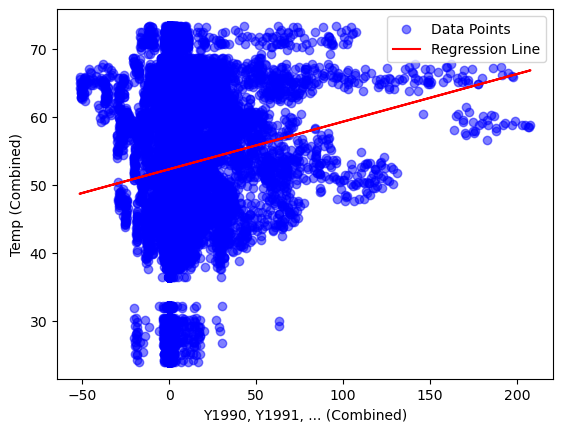

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Reshape data for a single linear regression
years = range(1990, 2023)
X = []
Y = []

# Loop through years and combine columns
for year in years:
    X.extend(un_sector[f"Y{year}"].values)  # Independent variable
    Y.extend(un_sector[f"{year}Temp"].values)  # Dependent variable
print(len(X))
# Convert to numpy arrays
X = np.array(X).reshape(-1, 1)
Y = np.array(Y)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X, Y)

# Predict the Y values
Y_pred = model.predict(X)

# Plot the data points
plt.scatter(X, Y, color='blue', alpha=0.5, label='Data Points')

# Plot the regression line
plt.plot(X, Y_pred, color='red', label='Regression Line')

plt.xlabel('Y1990, Y1991, ... (Combined)')
plt.ylabel('Temp (Combined)')
plt.legend()
plt.show()


In [ ]:
# Get the slope (m) and intercept (b)
m = model.coef_[0]  # Since it's a simple regression, there's only one coefficient
b = model.intercept_

# Print the equation
print(f"The equation of the regression line is: y = {m:.2f}x + {b:.2f}")


The equation of the regression line is: y = 0.07x + 52.34


In [ ]:
# Calculate the R^2 value
r_squared = model.score(X, Y)

# Print the R^2 value
print(f"The R^2 value is: {r_squared:.4f}")


The R^2 value is: 0.0008


KeyError: '1990Temp'

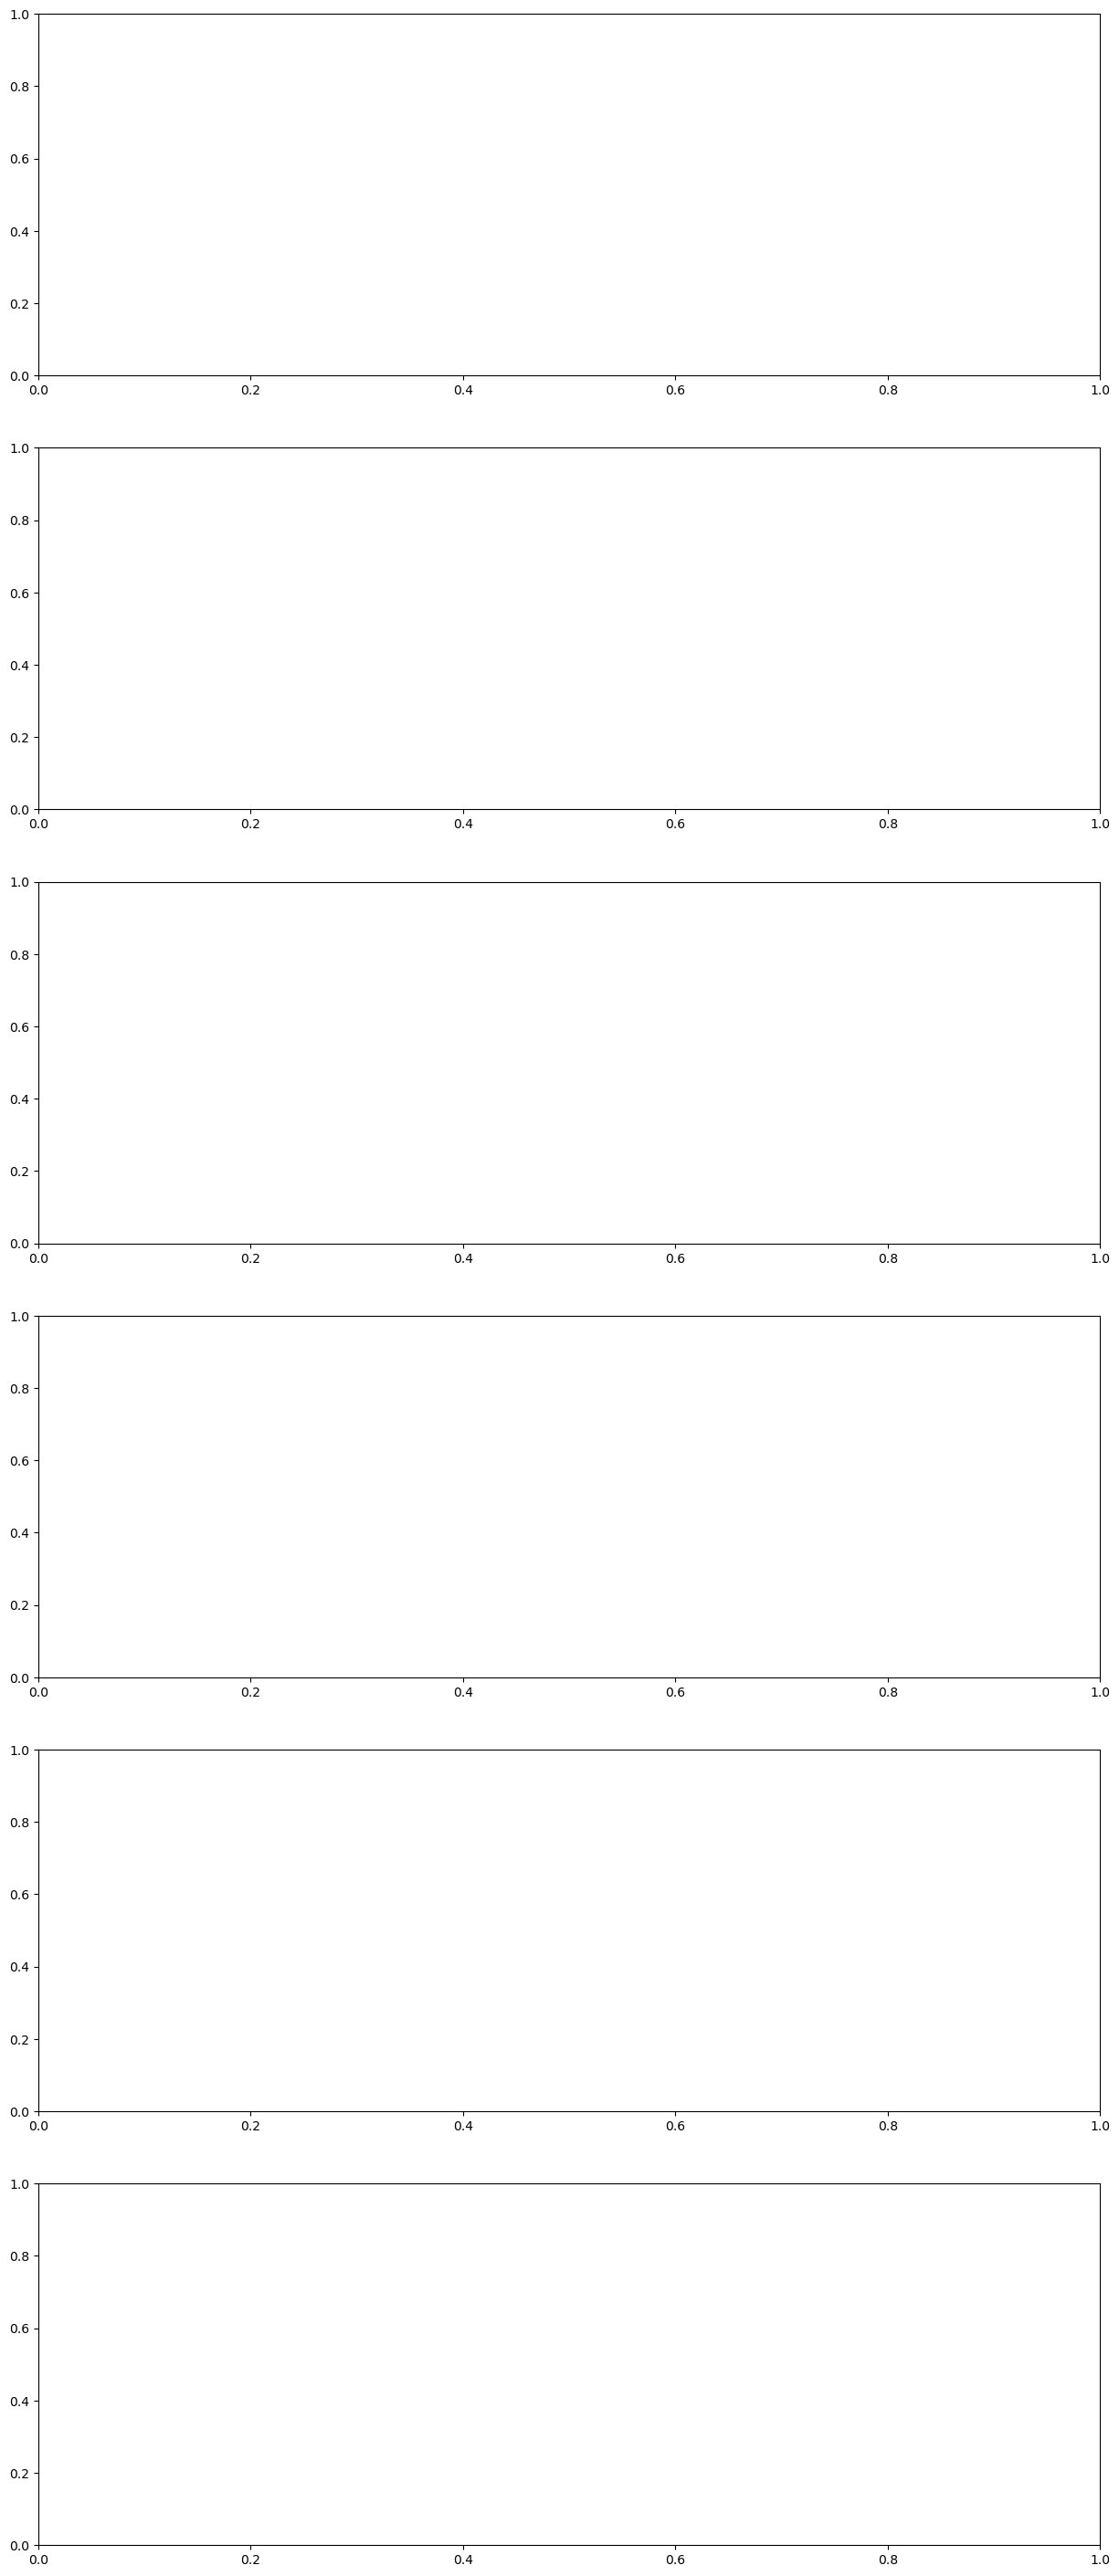

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

def run_sector_group_analysis(un_sector):
    # Group by sector
    grouped = un_sector.groupby('sector')
    
    # Store results
    results = {}
    
    # Create subplot grid
    n_sectors = len(grouped)
    fig, axs = plt.subplots(n_sectors, 1, figsize=(15, 6*n_sectors))
    
    # For each sector group
    for idx, (sector_name, sector_data) in enumerate(grouped):
        # Get temperature and emission data for all years
        temps = []
        emissions = []
        
        # Collect data across all years
        for year in range(1990, 2023):
            temp_col = f'{year}Temp'
            emission_col = f'Y{year}'
            
            # Convert to numeric and handle any non-numeric values
            year_temps = pd.to_numeric(sector_data[temp_col], errors='coerce')
            year_emissions = pd.to_numeric(sector_data[emission_col], errors='coerce')
            
            # Only keep pairs where both values are valid
            valid_mask = ~pd.isna(year_temps) & ~pd.isna(year_emissions)
            valid_temps = year_temps[valid_mask]
            valid_emissions = year_emissions[valid_mask]
            
            temps.extend(valid_temps)
            emissions.extend(valid_emissions)
        
        # Convert to numpy arrays
        temps = np.array(temps)
        emissions = np.array(emissions)
        
        # Skip if no valid data
        if len(temps) == 0 or len(emissions) == 0:
            print(f"Skipping {sector_name} - no valid data")
            continue
            
        # Run regression
        slope, intercept, r_value, p_value, std_err = st.linregress(emissions, temps)
        
        # Store results
        results[sector_name] = {
            'slope': slope,
            'intercept': intercept,
            'r_squared': r_value**2,
            'p_value': p_value,
            'std_err': std_err
        }
        
        # Plot
        if isinstance(axs, np.ndarray):
            ax = axs[idx]
        else:
            ax = axs  # In case there's only one sector
            
        ax.scatter(emissions, temps, alpha=0.5, s=5)
        
        # Add regression line
        x_range = np.linspace(min(emissions), max(emissions), 100)
        ax.plot(x_range, slope * x_range + intercept, 'r', 
               label=f'R² = {r_value**2:.3f}\np = {p_value:.3e}')
        
        ax.set_title(f'Sector: {sector_name}')
        ax.set_xlabel('Emissions')
        ax.set_ylabel('Temperature')
        ax.legend()
        
        # Add text with statistics
        stats_text = (f'Slope: {slope:.2e}\n'
                     f'Intercept: {intercept:.2f}\n'
                     f'Std Error: {std_err:.2e}')
        ax.text(0.02, 0.98, stats_text, 
               transform=ax.transAxes,
               verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    
    # Print summary of results
    print("\nRegression Results Summary:")
    print("--------------------------")
    for sector, stats in results.items():
        print(f"\nSector: {sector}")
        print(f"R-squared: {stats['r_squared']:.4f}")
        print(f"P-value: {stats['p_value']:.4e}")
        print(f"Slope: {stats['slope']:.4e}")
    
    return fig, results

# Run the analysis
fig, regression_results = run_sector_group_analysis(un_sector)
plt.show()

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Emissions (Teragrams)')

Text(0.5, 1.0, 'Time Series Regression: Emissions vs Temperature (1990-2022)')

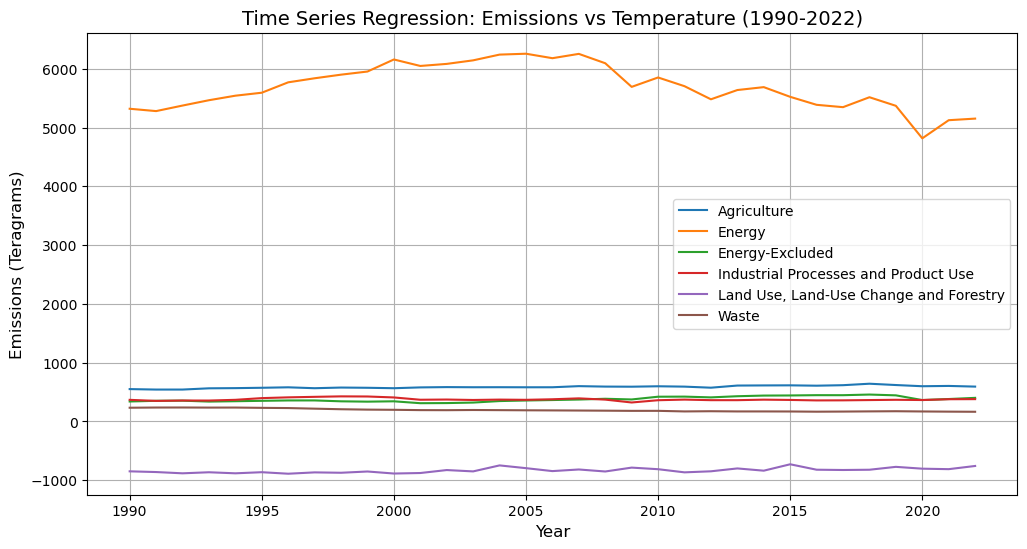

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Preparing the time series data
years = list(range(1990, 2023))  # Extract years from column names
emissions_columns = [f"Y{year}" for year in years]
temperature_columns = [f"{year}_Temp" for year in years]

sector_emissions_data = un_sector.groupby('sector')[[f"Y{year}" for year in years]].sum()
state_emissions_data = un_sector.groupby('geo_ref')[[f"Y{year}" for year in years]].sum()
# sector_emissions_data
# state_emissions_data
temperature_data = un_sector.groupby('geo_ref')[[f"{year}Temp" for year in years]].mean().agg(['mean'])


# # Aggregating data
# X = sector_emissions_data.T  # Shape (33, 6)
y = temperature_data.values.reshape(-1)  # Shape (33,)
# X.shape, y.shape

# # Add constant for regression
# X = sm.add_constant(X)

# # Fit the regression model
# time_series_model = sm.OLS(y, X).fit()
# print(time_series_model.summary())

plt.figure(figsize=(12, 6))
# plt.plot(years, y, label='Actual Temperature', color='blue', marker='o')
# plt.plot(years, , label='Predicted Temperature', color='red', linestyle='--')
for sector in sector_emissions_data.index:
    plt.plot(years, sector_emissions_data.loc[sector], label=sector)

plt.legend()

# Add labels, title, and legend
plt.xlabel('Year', fontsize=12)
plt.ylabel('Emissions (Teragrams)', fontsize=12)
plt.title('Time Series Regression: Emissions vs Temperature (1990-2022)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()


In [ ]:
for sector in sector_emissions_data.index:
    ax.plot(years, sector_emissions_data.loc[sector], label=sector)
    ax.legend(title='Sector')

ax.show()

AttributeError: 'Axes' object has no attribute 'show'

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load your dataset
data = pd.read_csv('unSectorWithTemp.csv')

# Select emissions and temperature columns (adjust column names based on your dataset)
emissions_columns = [f"Y{year}" for year in range(1990, 2023)]  # Example
temperature_columns = [f"{year}Temp" for year in range(1990, 2023)]  # Example

# Prepare the data
X = data[emissions_columns].T  # Transpose to align with time series
y = temperature_data.values.reshape(-1)  # Average temperature

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant for regression
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the OLS regression model
model = sm.OLS(y_train, X_train).fit()

# Predict and evaluate on the test set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Print model summary and R^2 score
print(model.summary())
print(f"R^2 Score: {r2}")


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/tsatools.py:162: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  x = pd.concat(x[::order], axis=1)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resi

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 04 Dec 2024   Prob (F-statistic):                nan
Time:                        12:52:59   Log-Likelihood:                 712.52
No. Observations:                  26   AIC:                            -1373.
Df Residuals:                       0   BIC:                            -1340.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0           1.052e-14        inf          0        n

sector                                          subsector category  \
0  Agriculture  CO2 Emissions from Liming, Urea Application an...   Liming   
1  Agriculture  CO2 Emissions from Liming, Urea Application an...   Liming   
2  Agriculture  CO2 Emissions from Liming, Urea Application an...   Liming   
3  Agriculture  CO2 Emissions from Liming, Urea Application an...   Liming   
4  Agriculture  CO2 Emissions from Liming, Urea Application an...   Liming   

  sub_category_1 sub_category_2 sub_category_3 carbon_pool fuel1 fuel2  \
0       Dolomite            NaN            NaN         NaN   NaN   NaN   
1       Dolomite            NaN            NaN         NaN   NaN   NaN   
2       Dolomite            NaN            NaN         NaN   NaN   NaN   
3       Dolomite            NaN            NaN         NaN   NaN   NaN   
4       Dolomite            NaN            NaN         NaN   NaN   NaN   

  geo_ref  ... 2013Temp 2014Temp 2015Temp  2016Temp  2017Temp  2018Temp  \
0      AK  ...     27.8     30.3     30.0      31.9      29.3      30.4   
1      AL  ...     62.6     62.0     64.6      65.3      65.0      64.5   
2      AR  ...     59.6     58.7     61.4      62.8      62.5      61.2   
3      AZ  ...     60.5     62.3     61.8      62.2      63.0      62.3   
4      CA  ...     59.3     61.5     60.8      60.1      60.3      60.1   

   2019Temp  2020Temp  2021Temp  2022Temp  
0      32.2      27.5      26.5      28.6  
1      65.4      64.9      64.2      64.0  
2      61.2      61.2      61.4      61.2  
3      60.3      62.6      62.1      61.2  
4      58.4      60.5      60.4      60.1  

[5 rows x 80 columns]

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Percentage Change (%)')

Text(0.5, 1.0, 'Percentage Change in Emissions and Temperature (1990-2022)')

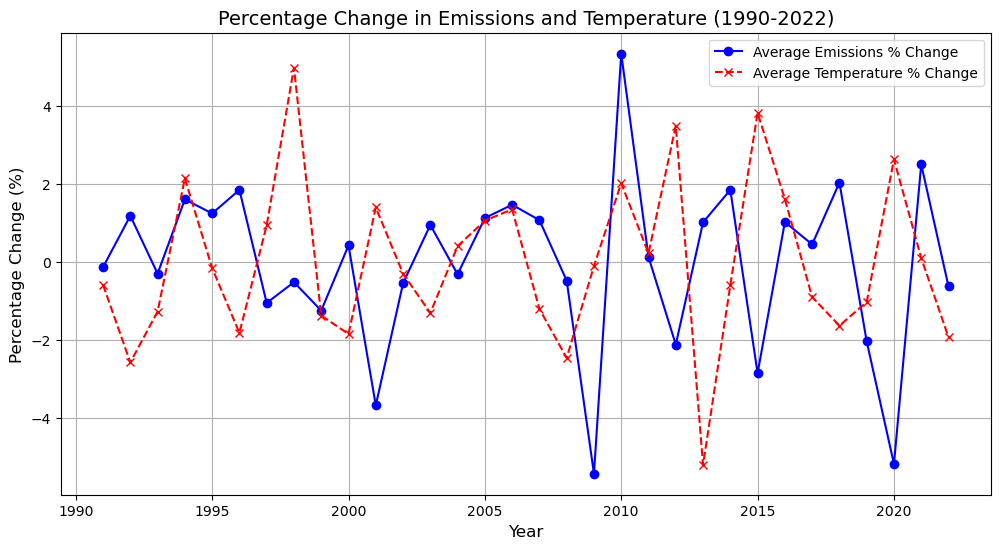

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('unSectorWithTemp.csv')
# Identify emissions and temperature columns
emissions_columns = [col for col in data.columns if col.startswith("Y") and col[1:].isdigit()]
temperature_columns = [col for col in data.columns if col.endswith("Temp")]

# Calculate percentage change for emissions and temperature data
emissions_pct_change = sector_emissions_data[emissions_columns].pct_change(axis=1) * 100
temperature_pct_change = temperature_data[temperature_columns].pct_change(axis=1) * 100

# Compute mean percentage change across rows for emissions and temperature
avg_emissions_pct_change = emissions_pct_change.mean(axis=0)
avg_temperature_pct_change = temperature_pct_change.mean(axis=0)

# Years for plotting
years = [int(col[1:]) for col in emissions_columns]

# Plot percentage changes
plt.figure(figsize=(12, 6))

# Plot emissions percentage change
plt.plot(years, avg_emissions_pct_change, label='Average Emissions % Change', marker='o', linestyle='-', color='blue')

# Plot temperature percentage change
plt.plot(years, avg_temperature_pct_change, label='Average Temperature % Change', marker='x', linestyle='--', color='red')

# Add labels, title, and legend
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage Change (%)', fontsize=12)
plt.title('Percentage Change in Emissions and Temperature (1990-2022)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)

plt.show()


Correlation Coefficient between Emissions % Change and Temperature % Change: -0.2371


<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Emissions % Change')

Text(0, 0.5, 'Temperature % Change')

Text(0.5, 1.0, 'Correlation between Emissions and Temperature Percentage Change')

Text(0.05, 0.95, 'Correlation: -0.24')

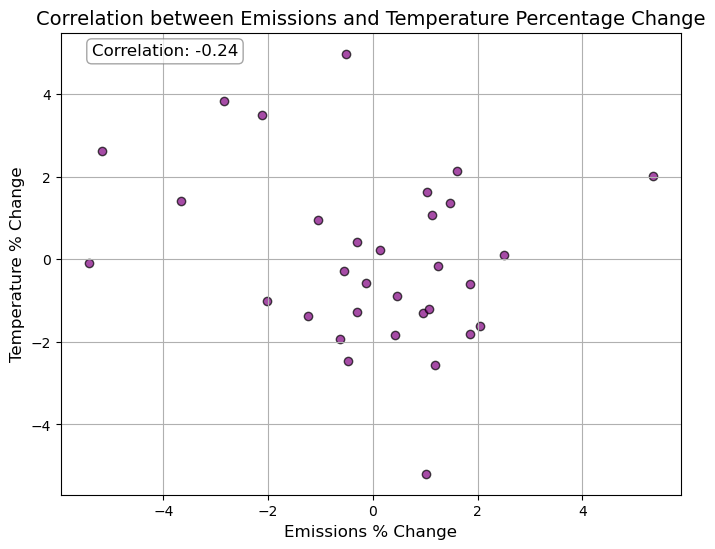

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure emissions and temperature percentage change data are aligned by year
aligned_emissions_pct_change = avg_emissions_pct_change.dropna().values
aligned_temperature_pct_change = avg_temperature_pct_change.dropna().values

# Calculate correlation coefficient between emissions % change and temperature % change
correlation = np.corrcoef(aligned_emissions_pct_change, aligned_temperature_pct_change)[0, 1]

# Display the correlation result
print(f"Correlation Coefficient between Emissions % Change and Temperature % Change: {correlation:.4f}")

# Scatter plot to visualize the correlation
plt.figure(figsize=(8, 6))
plt.scatter(aligned_emissions_pct_change, aligned_temperature_pct_change, color='purple', alpha=0.7, edgecolor='k')

# Add labels and title
plt.xlabel('Emissions % Change', fontsize=12)
plt.ylabel('Temperature % Change', fontsize=12)
plt.title('Correlation between Emissions and Temperature Percentage Change', fontsize=14)
plt.grid(True)

# Add the correlation value to the plot
plt.annotate(f"Correlation: {correlation:.2f}", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, 
             bbox=dict(boxstyle="round", fc="w", ec="gray", alpha=0.7))

plt.show()
